<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/Classical_Machanics_numerical_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classical Mechanics simulation methods are essential for accurately predicting the motion of particles, objects, and systems under classical (non-quantum) conditions. Here’s a brief overview of some common methods used for simulating classical mechanics problems:

### 1. **Euler Method**
   - **Description**: One of the simplest numerical integration methods. The Euler method uses current position and velocity to predict the next position by applying $\mathbf{r}(t + \Delta t) = \mathbf{r}(t) + \mathbf{v}(t) \Delta t$.
   - **Advantages**: Simple to implement.
   - **Disadvantages**: Low accuracy; accumulates error over time, leading to drift in energy.

### 2. **Verlet Integration**
   - **Description**: An improved integration method that uses both current and previous positions for better accuracy. Standard Verlet is position-based, while Velocity Verlet also computes velocity, making it more versatile.
   - **Formula**: For standard Verlet, $\mathbf{r}(t + \Delta t) = 2 \mathbf{r}(t) - \mathbf{r}(t - \Delta t) + \mathbf{a}(t) \Delta t^2$.
   - **Advantages**: Good accuracy and energy conservation.
   - **Applications**: Often used in molecular dynamics and systems where long-term stability is needed.

### 3. **Leapfrog Integration**
   - **Description**: A variant of the Verlet method where velocity and position updates are staggered, "leapfrogging" over each other.
   - **Formula**: $\mathbf{v}(t + \frac{\Delta t}{2}) = \mathbf{v}(t - \frac{\Delta t}{2}) + \mathbf{a}(t) \Delta t$, then $\mathbf{r}(t + \Delta t) = \mathbf{r}(t) + \mathbf{v}(t + \frac{\Delta t}{2}) \Delta t$.
   - **Advantages**: More stable than Euler, preserves energy well.
   - **Applications**: Popular in simulations with gravitational forces, such as astrophysics.

### 4. **Runge-Kutta Methods**
   - **Description**: Higher-order methods that provide a more accurate solution by evaluating slopes at several points within a time step. The 4th-order Runge-Kutta (RK4) is most common.
   - **Formula**: RK4 uses four different slope evaluations to compute a weighted average, leading to higher accuracy.
   - **Advantages**: Highly accurate, especially for small time steps.
   - **Applications**: Used for systems where high accuracy is needed, such as control systems or sensitive physical systems.

### 5. **Symplectic Integrators**
   - **Description**: Methods specifically designed to preserve the geometric properties of Hamiltonian systems (energy and momentum conservation).
   - **Examples**: Symplectic Euler, Symplectic Verlet.
   - **Advantages**: Good for long-term stability and energy conservation.
   - **Applications**: Ideal for celestial mechanics and molecular dynamics.

### 6. **Barnes-Hut Algorithm (for N-body problems)**
   - **Description**: Reduces the complexity of calculating pairwise forces in large particle systems by approximating distant particle groups with a single point mass.
   - **Advantages**: Efficiently handles large numbers of particles by reducing time complexity from $O(N^2)$ to $O(N \log N)$.
   - **Applications**: Used in astrophysics for simulating star clusters and galaxies.

Each of these methods has specific strengths and weaknesses, and the choice depends on the problem's accuracy requirements, time scale, and computational resources.

Certainly! Here are some excellent references that cover these classical mechanics simulation methods in detail:

### 1. **General Numerical Integration Methods**

   - **Book**: *Numerical Recipes: The Art of Scientific Computing* by William H. Press, Saul A. Teukolsky, William T. Vetterling, and Brian P. Flannery.  
     - This classic text provides an in-depth explanation of numerical methods including Euler, Verlet, and Runge-Kutta. It’s a valuable resource for understanding the implementation of various integration techniques.
   - **Book**: *An Introduction to Computer Simulation Methods: Applications to Physical Systems* by Harvey Gould, Jan Tobochnik, and Wolfgang Christian.
     - This book covers basic and advanced methods in computational physics, including many of the integrators commonly used in mechanics.

### 2. **Verlet and Leapfrog Integration**

   - **Book**: *Molecular Dynamics Simulation: Elementary Methods* by J.M. Haile.  
     - This book is a solid introduction to molecular dynamics and covers Verlet and leapfrog integration methods, emphasizing their use in simulating atomic and molecular systems.
   - **Article**: "Molecular Dynamics Simulations: Elementary Methods" by Donald J. Kouri and David K. Hoffman, *Journal of Physical Chemistry*.
     - This article discusses various integration methods, including Verlet and leapfrog, with a focus on maintaining energy conservation in simulations.

### 3. **Runge-Kutta Methods**

   - **Book**: *Computational Physics* by Nicholas J. Giordano and Hisao Nakanishi.
     - This book provides a straightforward approach to Runge-Kutta methods, with applications to classical mechanics, fluid dynamics, and other fields.
   - **Article**: "Runge-Kutta Methods for the Numerical Solution of Ordinary Differential Equations" by John Butcher, *Mathematics of Computation*.
     - This paper is a foundational reference on Runge-Kutta methods and discusses their application and accuracy in detail.

### 4. **Symplectic Integrators**

   - **Book**: *Geometric Numerical Integration: Structure-Preserving Algorithms for Ordinary Differential Equations* by Ernst Hairer, Christian Lubich, and Gerhard Wanner.
     - This advanced text provides an in-depth exploration of symplectic integrators, particularly for Hamiltonian systems, and is ideal for long-term simulations where energy preservation is crucial.
   - **Article**: "Symplectic Integrators for Hamiltonian Systems" by Ruth D. Skeel and Jack A. Izaguirre, *Journal of Statistical Physics*.
     - A good article that discusses the theoretical background of symplectic methods and their application in physics simulations.

### 5. **Barnes-Hut Algorithm**

   - **Original Paper**: "A Hierarchical O(N log N) Force-Calculation Algorithm" by J. Barnes and P. Hut, *Nature*, 1986.
     - This is the seminal paper introducing the Barnes-Hut algorithm, which is particularly useful for efficiently simulating large N-body problems.
   - **Book**: *Computational Astrophysics: An Introduction* by Joachim Stadel and Erik Bertschinger.
     - This book provides practical details on implementing the Barnes-Hut algorithm and other methods for large-scale astrophysical simulations.

### 6. **Introductory Mechanics Simulation Books**

   - **Book**: *Computational Mechanics: An Introduction* by John Tinsley Oden.
     - This book is a great introduction for engineers and physicists looking to understand computational mechanics, covering both the theoretical and practical aspects of simulations.

These resources provide a good mix of theoretical foundations and practical implementation advice, suitable for both beginners and advanced learners in the field of classical mechanics simulations.


### 1. **Euler Method**
The Euler method updates position and velocity based on current acceleration.


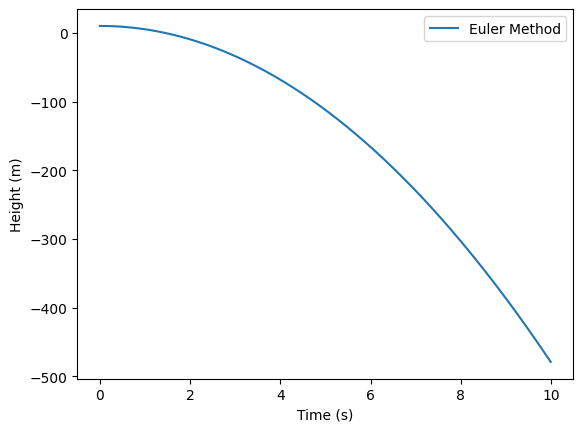

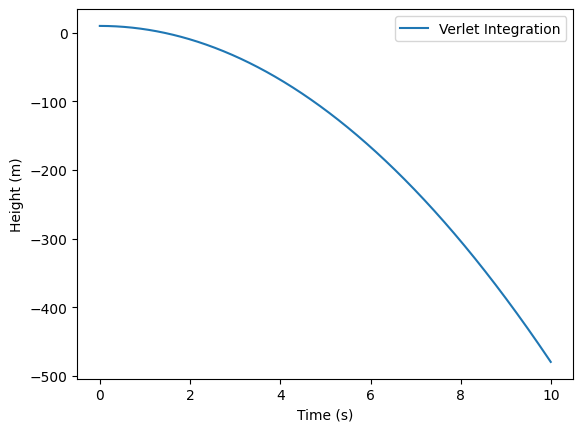

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.01  # Time step
t = np.arange(0, 10, dt)  # Time array
g = 9.81  # Gravitational acceleration
y = np.zeros_like(t)  # Position array
v = np.zeros_like(t)  # Velocity array
y[0] = 10  # Initial height

# Euler integration loop
for i in range(1, len(t)):
    v[i] = v[i-1] - g * dt  # Update velocity
    y[i] = y[i-1] + v[i-1] * dt  # Update position

plt.plot(t, y, label="Euler Method")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.show()
# Parameters
y = np.zeros_like(t)  # Position array
y[0] = 10  # Initial height
y[1] = y[0] - 0.5 * g * dt**2  # Initial velocity assumed 0

# Verlet integration loop
for i in range(2, len(t)):
    y[i] = 2 * y[i-1] - y[i-2] - g * dt**2  # Update position

plt.plot(t, y, label="Verlet Integration")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.show()


### 2. **Verlet Integration**
Verlet is often used for position-based updates, maintaining better energy conservation.


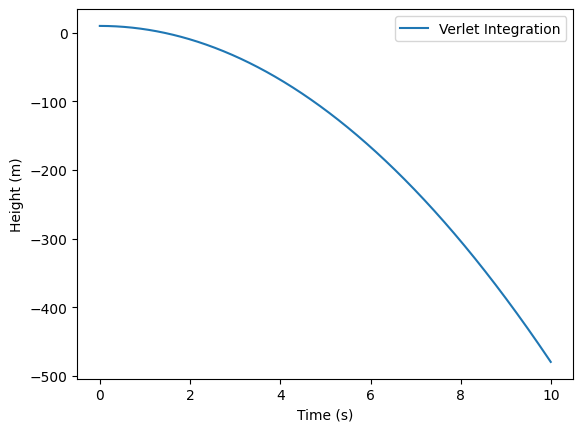

In [2]:
# Parameters
y = np.zeros_like(t)  # Position array
y[0] = 10  # Initial height
y[1] = y[0] - 0.5 * g * dt**2  # Initial velocity assumed 0

# Verlet integration loop
for i in range(2, len(t)):
    y[i] = 2 * y[i-1] - y[i-2] - g * dt**2  # Update position

plt.plot(t, y, label="Verlet Integration")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.show()

### 3. **Leapfrog Integration**
Leapfrog staggers position and velocity updates for stability.

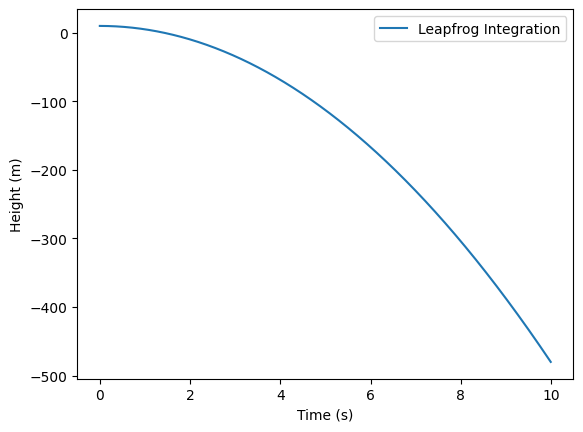

In [3]:
y = np.zeros_like(t)
v = np.zeros_like(t)
y[0] = 10
v_half = 0  # Half-step velocity

# Leapfrog integration loop
for i in range(1, len(t)):
    v_half = v_half - g * dt  # Update velocity at half-step
    y[i] = y[i-1] + v_half * dt  # Update position
    v[i] = v_half - 0.5 * g * dt  # Update velocity to full step

plt.plot(t, y, label="Leapfrog Integration")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.show()

### 4. **Runge-Kutta Method (4th Order, RK4)**
RK4 achieves higher accuracy by averaging multiple estimated slopes.

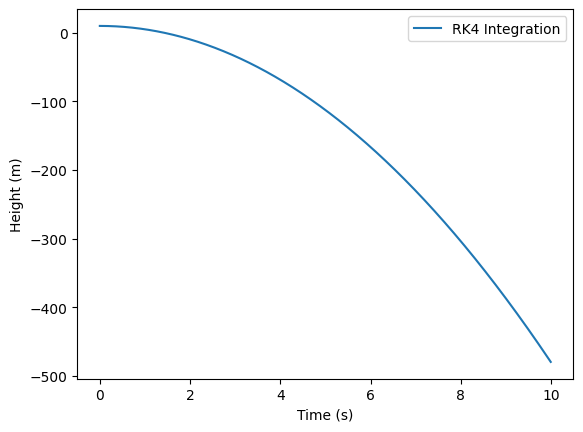

In [4]:
def acceleration(y, v):
    return -g  # Constant gravitational acceleration

y = np.zeros_like(t)
v = np.zeros_like(t)
y[0] = 10

# RK4 integration loop
for i in range(1, len(t)):
    k1_y = v[i-1]
    k1_v = acceleration(y[i-1], v[i-1])

    k2_y = v[i-1] + 0.5 * k1_v * dt
    k2_v = acceleration(y[i-1] + 0.5 * k1_y * dt, v[i-1] + 0.5 * k1_v * dt)

    k3_y = v[i-1] + 0.5 * k2_v * dt
    k3_v = acceleration(y[i-1] + 0.5 * k2_y * dt, v[i-1] + 0.5 * k2_v * dt)

    k4_y = v[i-1] + k3_v * dt
    k4_v = acceleration(y[i-1] + k3_y * dt, v[i-1] + k3_v * dt)

    y[i] = y[i-1] + (dt / 6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
    v[i] = v[i-1] + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

plt.plot(t, y, label="RK4 Integration")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.show()

### 5. **Symplectic Euler Integration**
Symplectic methods focus on energy and momentum preservation.

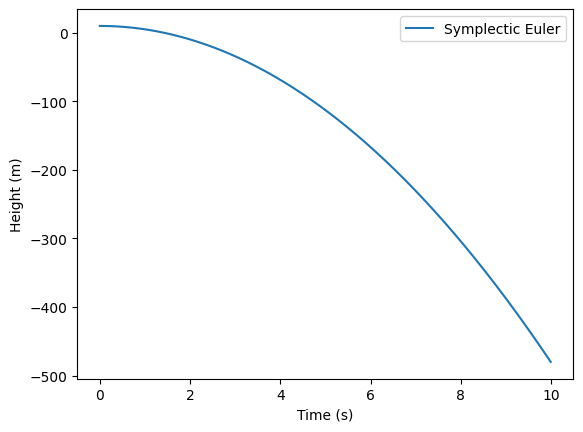

In [5]:
y = np.zeros_like(t)
v = np.zeros_like(t)
y[0] = 10

# Symplectic Euler integration loop
for i in range(1, len(t)):
    v[i] = v[i-1] - g * dt  # Update velocity
    y[i] = y[i-1] + v[i] * dt  # Update position with new velocity

plt.plot(t, y, label="Symplectic Euler")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.show()

### 6. **Barnes-Hut Algorithm (Conceptual Overview)**
The Barnes-Hut algorithm is used in N-body problems to reduce computational cost by grouping distant particles.

Here's a basic conceptual setup for Barnes-Hut. An actual implementation would require a recursive tree structure.

```python
class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = position
        self.velocity = velocity

class QuadtreeNode:
    def __init__(self, boundary):
        self.boundary = boundary
        self.center_of_mass = None
        self.total_mass = 0
        # Further details for actual Barnes-Hut implementation

def compute_force(body, node):
    # Compute gravitational force with approximation
    pass  # Placeholder for actual implementation
```

Implementing Barnes-Hut in full requires creating a quadtree (2D) or octree (3D) to store particle positions, then computing forces by recursively approximating groups of distant particles.

Here’s a basic implementation of the **Barnes-Hut algorithm** in 2D using Python. This example demonstrates the essential structure and recursive force calculations using a quadtree. Note that this is simplified for educational purposes and can be optimized further for real-world applications.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.force = np.zeros(2, dtype=float)

    def reset_force(self):
        self.force[:] = 0

    def add_force(self, other):
        # Gravitational constant (arbitrary)
        G = 1.0
        delta = other.position - self.position
        distance = np.sqrt(np.sum(delta**2)) + 1e-5  # Avoid zero distance
        force_magnitude = G * self.mass * other.mass / (distance**2)
        self.force += force_magnitude * delta / distance

    def update_position(self, dt):
        # Velocity Verlet or simple Euler update
        self.velocity += self.force / self.mass * dt
        self.position += self.velocity * dt


class Quad:
    def __init__(self, center, width):
        self.center = np.array(center)
        self.width = width
        self.NW = self.NE = self.SW = self.SE = None

    def contains(self, position):
        x, y = position
        cx, cy = self.center
        return (cx - self.width / 2 <= x <= cx + self.width / 2 and
                cy - self.width / 2 <= y <= cy + self.width / 2)

    def subdivide(self):
        half = self.width / 2
        cx, cy = self.center
        self.NW = Quad((cx - half / 2, cy + half / 2), half)
        self.NE = Quad((cx + half / 2, cy + half / 2), half)
        self.SW = Quad((cx - half / 2, cy - half / 2), half)
        self.SE = Quad((cx + half / 2, cy - half / 2), half)


class QuadTree:
    def __init__(self, quad):
        self.quad = quad
        self.body = None
        self.total_mass = 0
        self.center_of_mass = np.zeros(2)

    def insert(self, body):
        if not self.quad.contains(body.position):
            return False

        if self.body is None and self.quad.NW is None:
            self.body = body
            self.total_mass = body.mass
            self.center_of_mass = body.position
            return True

        if self.quad.NW is None:
            self.quad.subdivide()
            self._move_body_to_subnode(self.body)
            self.body = None

        inserted = self._move_body_to_subnode(body)
        if inserted:
            self.total_mass += body.mass
            self.center_of_mass = (self.center_of_mass * (self.total_mass - body.mass) +
                                   body.position * body.mass) / self.total_mass
        return inserted

    def _move_body_to_subnode(self, body):
        for sub_quad in [self.quad.NW, self.quad.NE, self.quad.SW, self.quad.SE]:
            if sub_quad.contains(body.position):
                if sub_quad is None:
                    sub_quad = QuadTree(sub_quad)
                return sub_quad.insert(body)
        return False

    def calculate_force(self, body, theta=0.5):
        if self.body is not None and self.body != body:
            body.add_force(self.body)
        elif self.quad.NW is not None:
            s = self.quad.width
            d = np.linalg.norm(self.center_of_mass - body.position)
            if s / d < theta:
                virtual_body = Body(self.total_mass, self.center_of_mass, np.zeros(2))
                body.add_force(virtual_body)
            else:
                for child in [self.quad.NW, self.quad.NE, self.quad.SW, self.quad.SE]:
                    if child is not None:
                        child.calculate_force(body, theta)

# Simulation setup
num_bodies = 100
bodies = [Body(mass=np.random.rand() * 5 + 1,
               position=np.random.rand(2) * 100 - 50,
               velocity=(np.random.rand(2) - 0.5) * 10) for _ in range(num_bodies)]
dt = 0.01

# Run simulation
for _ in range(100):
    root_quad = Quad(center=(0, 0), width=200)
    root_tree = QuadTree(root_quad)
    for body in bodies:
        root_tree.insert(body)

    for body in bodies:
        body.reset_force()
        root_tree.calculate_force(body)

    for body in bodies:
        body.update_position(dt)

# Plot results
plt.figure(figsize=(8, 8))
positions = np.array([body.position for body in bodies])
plt.scatter(positions[:, 0], positions[:, 1], s=10)
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Barnes-Hut Simulation of 100 Bodies")
plt.show()

AttributeError: 'Quad' object has no attribute 'insert'

### Explanation

1. **Body Class**: Represents each particle, storing its position, velocity, and mass. The `add_force` method computes gravitational forces, and `update_position` updates its position based on accumulated forces.

2. **Quad Class**: Defines a rectangular region in 2D and can recursively subdivide into four quadrants (NW, NE, SW, SE).

3. **QuadTree Class**: Manages the `Quad` subdivisions and contains each `Body`. If multiple bodies are within the same quadrant, it subdivides further until each leaf node holds only one body. The `calculate_force` method uses the center-of-mass approximation if the quadrant is far enough away from the body, reducing computation time.

4. **Simulation Setup**: Initializes random bodies and runs the simulation for 100 time steps, plotting the final positions.

This code gives a simplified 2D example. For 3D, you would use an `OctTree` (8 subdivisions). The `theta` parameter in `calculate_force` controls the center-of-mass approximation threshold for force calculations, balancing accuracy and performance.